# many-to-one-stacking

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint

print(tf.__version__)

2.1.0


#### 데이터 준비
* 1: richard feynman
* 0: albert einstein

In [2]:
sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1,0,0,1]  

#### 토큰 딕셔너리 생성 

In [3]:
char_set = ['<pad>'] + sorted(list(set("".join(sentences))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


#### 인덱스의 시퀀스를 토큰의 시퀀스로 변경하기 

In [4]:
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

print(x_data)
print(x_data_len)
print(y_data)

[[7, 14, 8, 25, 1, 5, 1, 10, 8, 19, 19, 20, 25, 1, 10, 23, 12, 8, 25, 12, 2, 1, 5, 1, 11, 20, 1, 19, 20, 25, 1, 26, 19, 11, 12, 23, 24, 25, 8, 19, 11, 3], [5, 19, 25, 12, 17, 17, 12, 10, 26, 8, 17, 24, 1, 24, 20, 17, 27, 12, 1, 21, 23, 20, 9, 17, 12, 18, 24, 2, 1, 13, 12, 19, 15, 26, 24, 12, 24, 1, 21, 23, 12, 27, 12, 19, 25, 1, 25, 14, 12, 18], [4, 1, 21, 12, 23, 24, 20, 19, 1, 28, 14, 20, 1, 19, 12, 27, 12, 23, 1, 18, 8, 11, 12, 1, 8, 1, 18, 15, 24, 25, 8, 16, 12, 1, 19, 12, 27, 12, 23, 1, 25, 15, 12, 11, 1, 8, 19, 29, 25, 14, 15, 19, 13, 1, 19, 12, 28, 3], [6, 14, 12, 1, 24, 8, 18, 12, 1, 12, 22, 26, 8, 25, 15, 20, 19, 24, 1, 14, 8, 27, 12, 1, 25, 14, 12, 1, 24, 8, 18, 12, 1, 24, 20, 17, 26, 25, 15, 20, 19, 24, 3]]
[42, 50, 58, 43]
[1, 0, 0, 1]


#### 배치 처리를 위해 패딩하기 

In [5]:
max_sequence = 55
x_data = pad_sequences(sequences=x_data, maxlen=max_sequence, padding="post", truncating='post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
  12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25 14
  12 18  0  0  0  0  0]
 [ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
   8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
  25 14 15 19 13  1 19]
 [ 6 14 12  1 24  8 18 12  1 12 22 26  8 25 15 20 19 24  1 14  8 27 12  1
  25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
   0  0  0  0  0  0  0]]
[42, 50, 58, 43]
[1, 0, 0, 1]


#### 모델 만들기
* many to one 구분을 위한 단순 rnn 모델
* np.eye : 정방단위행렬 반환
* mask_zero=True : 전처리 단계에서 0으로된 부분을 알아서 처리함
* trainable=False : 학습 하지 않음

In [6]:
input_dim = len(char2idx)       # 입력 차수
output_dim = len(char2idx)      # 출력 차수
one_hot = np.eye(len(char2idx)) # 원-핫 인코딩

hidden_dims = [10, 10]  # 은닉층 10 X 10
num_classes = 2         # 결과 종류 2

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=output_dim, trainable=False, mask_zero=True, input_length=max_sequence,
                             embeddings_initializer=tf.keras.initializers.Constant(one_hot)),
    tf.keras.layers.SimpleRNN(units=hidden_dims[0], return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(rate=0.2)),
    tf.keras.layers.SimpleRNN(units=hidden_dims[1]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 55, 30)            900       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 55, 10)            410       
_________________________________________________________________
time_distributed (TimeDistri (None, 55, 10)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 1,542
Trainable params: 642
Non-trainable params: 900
______________________________________________________

#### 모델 최적화

In [7]:
# 비용 함수 
def loss_fn(model, x, y, training):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x, training), from_logits=True))

# 최적화기 선택 
lr = 0.01
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

In [8]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 55), (None,)), types: (tf.int32, tf.int32)>


#### 모델 학습

In [9]:
# 학습 비용을 기록할 리스트 
tr_loss_hist = []

# 에폭 횟수만큼 수행하면서 학습 
for epoch in range(epochs):
    avg_tr_loss = 0  # 손실 평균 
    tr_step = 0      # 학습 횟수
    
    # 학습 데이터 셋으로부터 학습 데이터와 학습 결과  추출하기 
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)  # 학습할 때와 아닐때 구분 
        
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
        
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))    
            

epoch :   5, tr_loss : 0.276
epoch :  10, tr_loss : 0.028
epoch :  15, tr_loss : 0.017
epoch :  20, tr_loss : 0.012
epoch :  25, tr_loss : 0.007
epoch :  30, tr_loss : 0.002


#### shape (19,19,5,80) 라면
* Axis 0 = 19 elements
* Axis 1 = 19 elements
* Axis 2 = 5 elements
* Axis 3 = 80 elements
#### 아래와 같은 의미 
* Axis -1 = 80 elements
* Axis -2 = 5 elements
* Axis -3 = 19 elements
* Axis -4 = 19 elements
#### argmax 처리 
* K.argmax(a,axis= 0 or -4) returns (19,5,80) with values from 0 to 18
* K.argmax(a,axis= 1 or -3) returns (19,5,80) with values from 0 to 18
* K.argmax(a,axis= 2 or -2) returns (19,19,80) with values from 0 to 4
* K.argmax(a,axis= 3 or -1) returns (19,19,5) with values from 0 to 79

In [10]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('accuracy : {:.2%}'.format(np.mean(yhat == y_data)))

accuracy : 100.00%


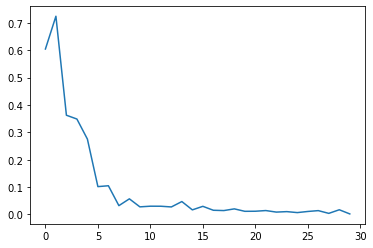

In [11]:
plt.plot(tr_loss_hist)